In [1]:
import re
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
import geopandas as gpd
from shapely.geometry import Point, box
import pandas as pd
import calendar
from datetime import datetime, timedelta
import seaborn as sns


from tqdm import tqdm
import rasterio
import rioxarray
from rasterio.mask import mask
from rasterio.plot import show
from shapely.geometry import mapping

## LAI

In [2]:
LAI_df = pd.read_csv('/global/scratch/users/liuwenjin021011/data/NOAA_LAI/Regridded_LAI_to_SMAP_Year_2018.csv')

In [3]:
LAI_df

,index,lat,lon,interpolated_LAI,interpolated_FAPAR,time
0,0,39.266701,90.980293,0.155057,0.085366,2018-02-22
1,1,39.266701,84.258301,0.165832,0.062502,2018-02-22
2,2,39.266701,84.164940,0.164367,0.064668,2018-02-22
3,3,39.266701,84.071579,0.165098,0.063970,2018-02-22
4,4,39.266701,83.978218,0.164898,0.065936,2018-02-22
...,...,...,...,...,...,...
53166333,266173,42.517681,118.335060,0.129251,0.138481,2018-11-07
53166334,266174,42.517681,118.241699,0.131238,0.142176,2018-11-07
53166335,266175,42.517681,118.148338,0.133224,0.145870,2018-11-07
53166336,266176,42.517681,78.469917,0.039804,0.184308,2018-11-07


## SAI

In [4]:
SAI_ll = pd.read_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_Lower_lat_Lower_lon.csv')
SAI_ll = SAI_ll[['lat', 'lon', 'time', 'SAI']]

## Canopy Reduction

In [4]:
def CR_func(SAI, LAI, k_s = 8.75, k_c = 0.24):
    return 0.5 * (np.exp(-k_s * SAI) + np.exp(-k_c * LAI))

In [6]:
SAI_df = SAI_ll.drop_duplicates()
FactorC_df= pd.merge(LAI_df, SAI_df, on=['lat', 'lon', 'time'], how='right')
FactorC_df = FactorC_df.dropna()
FactorC_df['CR'] = FactorC_df.apply(lambda row: CR_func(row['SAI'], row['interpolated_FAPAR']), axis=1)
FactorC_df.to_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_FactorC_Lower_lat_Lower_lon.csv')

In [7]:
min(FactorC_df['lat']), max(FactorC_df['lat']), min(FactorC_df['lon']), max(FactorC_df['lon'])

(20.212417602539062, 33.92534255981445, 76.97614288330078, 103.95746612548828)

In [8]:
SAI_lu = pd.read_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_Lower_lat_Upper_lon.csv')
SAI_lu = SAI_lu[['lat', 'lon', 'time', 'SAI']]

In [9]:
SAI_df = SAI_lu.drop_duplicates()
FactorC_df= pd.merge(LAI_df, SAI_df, on=['lat', 'lon', 'time'], how='right')
FactorC_df = FactorC_df.dropna()
FactorC_df['CR'] = FactorC_df.apply(lambda row: CR_func(row['SAI'], row['interpolated_FAPAR']), axis=1)
FactorC_df.to_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_FactorC_Lower_lat_Upper_lon.csv')

In [10]:
min(FactorC_df['lat']), max(FactorC_df['lat']), min(FactorC_df['lon']), max(FactorC_df['lon'])

(18.34492301940918, 33.92534255981445, 104.0508270263672, 127.11099243164062)

In [11]:
SAI_ul = pd.read_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_Upper_lat_Lower_lon.csv')
SAI_ul = SAI_ul[['lat', 'lon', 'time', 'SAI']]

In [12]:
SAI_df = SAI_ul.drop_duplicates()
FactorC_df= pd.merge(LAI_df, SAI_df, on=['lat', 'lon', 'time'], how='right')
FactorC_df = FactorC_df.dropna()
FactorC_df['CR'] = FactorC_df.apply(lambda row: CR_func(row['SAI'], row['interpolated_FAPAR']), axis=1)
FactorC_df.to_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_FactorC_Upper_lat_Lower_lon.csv')

In [13]:
min(FactorC_df['lat']), max(FactorC_df['lat']), min(FactorC_df['lon']), max(FactorC_df['lon'])

(34.010128021240234, 51.133087158203125, 73.70850372314453, 103.95746612548828)

In [5]:
SAI_uu = pd.read_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_Upper_lat_Upper_lon.csv')
SAI_uu = SAI_uu[['lat', 'lon', 'time', 'SAI']]

In [6]:
SAI_df = SAI_uu.drop_duplicates()
FactorC_df= pd.merge(LAI_df, SAI_df, on=['lat', 'lon', 'time'], how='right')
FactorC_df = FactorC_df.dropna()
FactorC_df['CR'] = FactorC_df.apply(lambda row: CR_func(row['SAI'], row['interpolated_FAPAR']), axis=1)
FactorC_df.to_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_FactorC_Upper_lat_Upper_lon.csv')

In [7]:
min(FactorC_df['lat']), max(FactorC_df['lat']), min(FactorC_df['lon']), max(FactorC_df['lon'])

(34.010128021240234, 53.42211151123047, 104.0508270263672, 134.67323303222656)

In [8]:
FactorC_ll = pd.read_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_FactorC_Lower_lat_Lower_lon.csv')
FactorC_lu = pd.read_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_FactorC_Lower_lat_Upper_lon.csv')
FactorC_ul = pd.read_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_FactorC_Upper_lat_Lower_lon.csv')
FactorC_uu = pd.read_csv('/global/scratch/users/liuwenjin021011/data/ThesisFactorC/Year2018_FactorC_Upper_lat_Upper_lon.csv')
FactorC = pd.concat([FactorC_ll, FactorC_lu, FactorC_ul, FactorC_uu])
FactorC.to_csv('/global/scratch/users/liuwenjin021011/data/FactorC_DONE_Year_2018.csv', header = True, index = False)

## Missing Stripe Fix

In [2]:
# Fix the Missing Stripe by Interpolation

FactorC = pd.read_csv('/global/scratch/users/liuwenjin021011/data/FactorC_DONE_Year_2018.csv')
FactorB = pd.read_csv('/global/scratch/users/liuwenjin021011/data/FactorB_DONE_Year_2018.csv')

/tmp/ipykernel_221989/1479489620.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  FactorB = pd.read_csv('/global/scratch/users/liuwenjin021011/data/FactorB_DONE_Year_2018.csv')


In [3]:
FactorC = FactorC[['lat', 'lon', 'interpolated_LAI', 'interpolated_FAPAR', 'time', 'SAI', 'CR']]
FactorB_lons = FactorB['lon'].unique()


In [ ]:
from tqdm import tqdm

def interpolate_closest_lon(FactorC, FactorB, output_path='/global/scratch/users/liuwenjin021011/data/ThesisFactorC/'):
    # Filter out longitudes that are not within the desired range
    FactorB_lons = FactorB['lon'].unique()
    relevant_lons = [lon for lon in FactorB_lons if 80 <= lon <= 130]

    # Find missing longitudes in FactorC compared to the filtered FactorB longitudes
    missing_lons = set(relevant_lons) - set(FactorC['lon'].unique())

    # Prepare for interpolation
    interpolated_rows = []

    # Create GeoDataFrame for spatial operations if FactorC is not already a GeoDataFrame
    if not isinstance(FactorC, gpd.GeoDataFrame):
        FactorC_gdf = gpd.GeoDataFrame(FactorC, geometry=gpd.points_from_xy(FactorC['lon'], FactorC['lat']))
        FactorC_gdf.set_crs(epsg=4326, inplace=True)
    else:
        FactorC_gdf = FactorC

    # Iterate over all combinations of lat, lon, and time to interpolate missing values
    for lat in tqdm(FactorC['lat'].unique(), desc='Lats'):
        times = FactorC[FactorC['lat'] == lat]['time'].unique()
        print(lat, len(times))
        for time in times:
            # Find the subset of FactorC for the current lat and time
            subset_FactorC = FactorC_gdf[(FactorC_gdf['lat'] == lat) & (FactorC_gdf['time'] == time)]

            for missing_lon in missing_lons:
                # Find the closest longitude in subset_FactorC to the missing longitude
                if not subset_FactorC.empty:
                    distances = np.abs(subset_FactorC['lon'] - missing_lon)
                    closest_index = distances.idxmin()
                    closest_row = subset_FactorC.loc[[closest_index]].copy()

                    # Set the missing longitude
                    closest_row['lon'] = missing_lon

                    # Append the interpolated row
                    interpolated_rows.append(closest_row)

    # Combine all the interpolated rows into a DataFrame
    interpolated_df = pd.concat(interpolated_rows, ignore_index=True)
    
    # Optionally, save the result to a CSV file
    interpolated_df.to_csv(f'{output_path}Missing_Stripe_Fix_year_2018.csv', index=False)

    # Merge the interpolated data back with the original FactorC
    FactorC_extended = pd.concat([FactorC, interpolated_df], ignore_index=True) 

    return FactorC_extended

# Example usage
FactorC_extended = interpolate_closest_lon(FactorC, FactorB)


Lats:   0%|          | 0/400 [00:00<?, ?it/s]

22.559192657470703 318


Lats:   0%|          | 1/400 [05:26<36:13:59, 326.92s/it]

22.63552474975586 325


Lats:   0%|          | 2/400 [11:00<36:35:09, 330.93s/it]

22.48290252685547 315


Lats:   1%|          | 3/400 [16:23<36:06:15, 327.39s/it]

22.40665435791016 312


Lats:   1%|          | 4/400 [21:44<35:43:23, 324.76s/it]

22.788312911987305 332


Lats:   1%|▏         | 5/400 [27:25<36:17:03, 330.69s/it]

22.8647689819336 336


Lats:   2%|▏         | 6/400 [33:09<36:41:19, 335.23s/it]

22.711896896362305 326


In [11]:
FactorC_extended.to_csv('/global/scratch/users/liuwenjin021011/data/FactorC_DONE_Year_2018.csv', header = True, index = False)

## Visualization

In [3]:
FactorC_2017 = pd.read_csv('/global/scratch/users/liuwenjin021011/data/FactorC_DONE_Year_2017.csv')
FactorC_2018 = pd.read_csv('/global/scratch/users/liuwenjin021011/data/FactorC_DONE_Year_2018.csv')
FactorC_2019 = pd.read_csv('/global/scratch/users/liuwenjin021011/data/FactorC_DONE_Year_2019.csv')

/tmp/ipykernel_6055/4267000813.py:44: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  plot_Canopy_Reduction(FactorC_2017, 2017, shapefile_path)
/tmp/ipykernel_6055/4267000813.py:45: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  plot_Canopy_Reduction(FactorC_2018, 2018, shapefile_path)
/tmp/ipykernel_6055/4267000813.py:46: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  plot_Canopy_Reduction(FactorC_2019, 2019, shapefile_path)


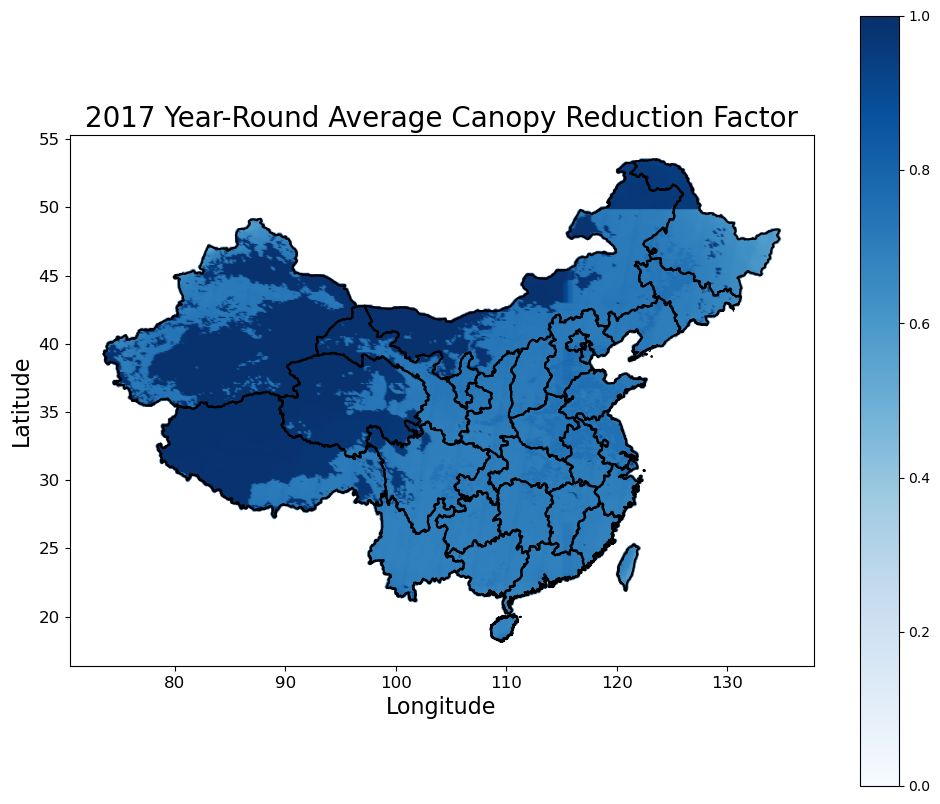

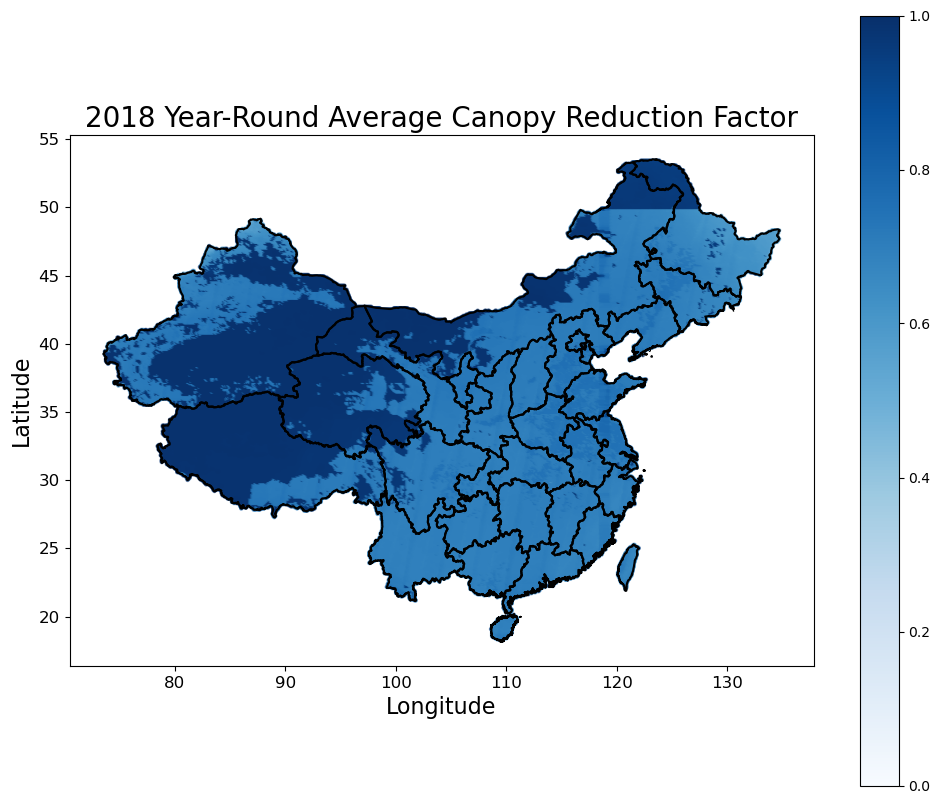

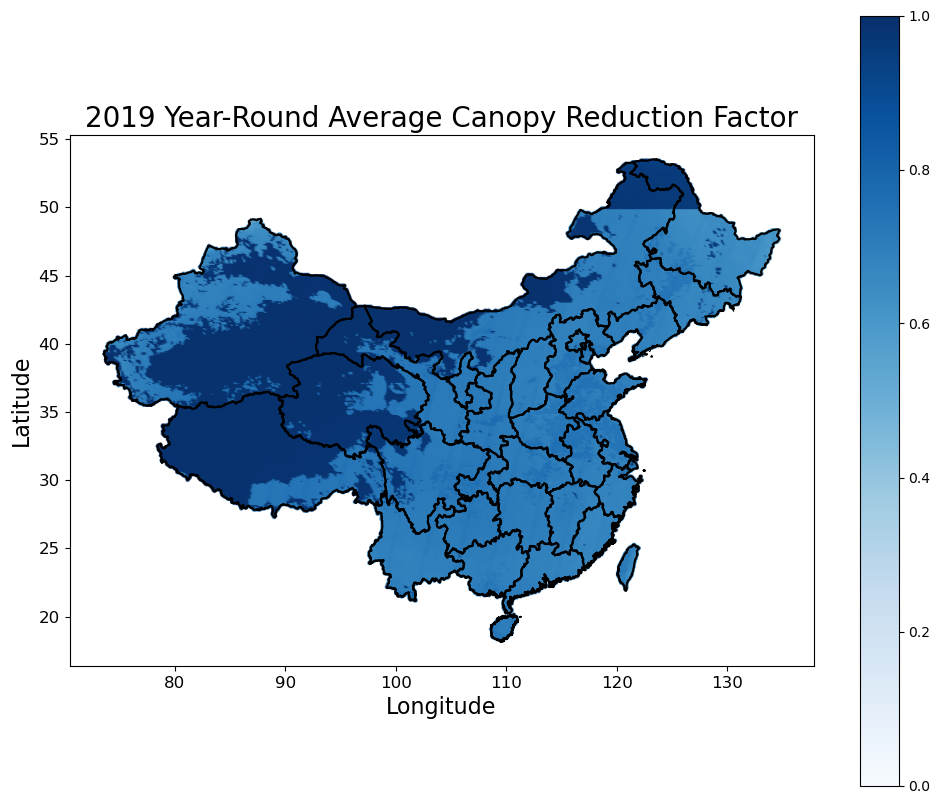

In [4]:
def filter_points_within_shape(df, shapefile_path, column):
    # Compute the average of the column of interest
    avg_df = df.groupby(['lat', 'lon'])[column].mean().reset_index()
    avg_df.rename(columns={column: f'avg_{column}'}, inplace=True)

    # Convert df to a GeoDataFrame
    gdf = gpd.GeoDataFrame(avg_df, geometry=gpd.points_from_xy(avg_df.lon, avg_df.lat))

    # Set the coordinate reference system (CRS)
    gdf.set_crs(epsg=4326, inplace=True)  # EPSG:4326 is WGS84, adjust as necessary

    # Load the shapefile
    base_map = gpd.read_file(shapefile_path)
    base_map.set_crs(epsg=4326, inplace=True)

    # Perform spatial join to keep only points within the shapefile boundaries
    gdf_within_shape = gpd.sjoin(gdf, base_map, how="inner", op='intersects')

    # Drop the 'index_right' column if exists
    if 'index_right' in gdf_within_shape.columns:
        gdf_within_shape.drop(columns=['index_right'], inplace=True)

    return gdf_within_shape, base_map

def plot_Canopy_Reduction(df, year, shapefile_path, column='CR', vmin=0, vmax=1):
    # Filter points to keep only those within the shapefile
    filtered_df, base_map = filter_points_within_shape(df, shapefile_path, column)

    # Plot
    fig, ax = plt.subplots(figsize=(12, 10))
    base_map.plot(ax=ax, color='white', edgecolor='black', alpha=0)  # Plot the base map first with no fill color
    filtered_df.plot(ax=ax, column=f'avg_{column}', cmap='Blues', legend=True, markersize=5, alpha=0.6, vmin=vmin, vmax=vmax)  # Then plot the data points
    base_map.boundary.plot(ax=ax, edgecolor='black')  # Plot the boundaries on top

    title= f'{year} Year-Round Average Canopy Reduction Factor'
    plt.title(title, fontsize=20)   
    plt.xlabel('Longitude', fontsize=16)  # Larger font size for the x-axis label
    plt.ylabel('Latitude', fontsize=16)  # Larger font size for the y-axis label
    plt.xticks(fontsize=12)  # Larger font size for the x-axis ticks
    plt.yticks(fontsize=12)  # Larger font size for the y-axis ticks

# Usage
shapefile_path = '/global/home/users/liuwenjin021011/logs/fall_2023/China-Province-Doundary-Shape.shp'
plot_Canopy_Reduction(FactorC_2017, 2017, shapefile_path)
plot_Canopy_Reduction(FactorC_2018, 2018, shapefile_path)
plot_Canopy_Reduction(FactorC_2019, 2019, shapefile_path)
